<a href="https://colab.research.google.com/github/Renjith5753/Deep-learning/blob/main/Drug_intake_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
#imorting the libreries

import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential 
from keras import layers
from google .colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import sequential
from keras import layers


In [10]:
uploading the data
data = files.upload()

Saving CE802_P3_Data.csv to CE802_P3_Data.csv


In [15]:
dataset = pd.read_csv('CE802_P3_Data.csv')
dataset

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,6.57,2,1.42,119.73,-3.34,Low,7.83,-4506.63,-16448.13,-214.64,6.96,-29.12,6,USA,3835.29,660.06,288.54
1,17.64,2,0.70,102.48,-9.77,High,2.43,-3326.25,-15865.93,-199.36,9.20,-30.42,4,UK,4130.94,683.22,1075.23
2,6.06,1,14.72,249.60,-2.26,Very high,4.29,-2206.02,-11705.56,-149.86,12.97,-21.58,16,USA,5305.89,769.83,1722.09
3,2.07,3,0.00,149.85,-0.99,High,3.50,-2798.73,-13815.70,-219.50,5.78,-38.10,10,Europe,2149.47,720.63,3376.78
4,18.99,5,1.92,26.67,-5.62,Low,3.10,-4357.92,-18105.59,-208.86,7.38,-7.06,6,Europe,5115.03,789.96,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,12.33,9,2.64,206.46,-3.44,High,6.73,-2566.77,-23124.56,-140.32,9.82,-38.42,8,Europe,3759.72,722.07,2952.31
1496,0.96,3,48.70,91.20,-3.68,Medium,3.46,-3142.26,-17738.33,-121.30,11.10,-31.12,8,UK,5409.42,987.69,0.00
1497,7.89,3,57.82,-65.46,-1.72,Medium,2.63,-1500.72,-15052.66,-253.74,6.19,-15.24,6,USA,4109.13,688.32,23.73
1498,3.75,5,59.36,78.69,-3.43,Low,2.28,-4507.05,-14998.52,-214.40,7.31,-28.96,8,Rest,4671.33,561.90,0.00


In [18]:
#data info

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   int64  
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   object 
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   int64  
 13  F14     1500 non-null   object 
 14  F15     1500 non-null   float64
 15  F16     1500 non-null   float64
 16  Target  1500 non-null   float64
dtypes: float64(13), int64(2), object(2)
memory usage: 199.3+ KB


In [19]:
#converting the catagorical values to numarical values

text_to_num = {'F6':  {'Very low':0,'Low':1,'High':3,'Very high':4,'Medium':2},
               'F14': {'Rest':0 ,'USA':1,'UK':2,'Europe': 3}}
dataset = dataset.replace(text_to_num)
dataset

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,6.57,2,1.42,119.73,-3.34,1,7.83,-4506.63,-16448.13,-214.64,6.96,-29.12,6,1,3835.29,660.06,288.54
1,17.64,2,0.70,102.48,-9.77,3,2.43,-3326.25,-15865.93,-199.36,9.20,-30.42,4,2,4130.94,683.22,1075.23
2,6.06,1,14.72,249.60,-2.26,4,4.29,-2206.02,-11705.56,-149.86,12.97,-21.58,16,1,5305.89,769.83,1722.09
3,2.07,3,0.00,149.85,-0.99,3,3.50,-2798.73,-13815.70,-219.50,5.78,-38.10,10,3,2149.47,720.63,3376.78
4,18.99,5,1.92,26.67,-5.62,1,3.10,-4357.92,-18105.59,-208.86,7.38,-7.06,6,3,5115.03,789.96,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,12.33,9,2.64,206.46,-3.44,3,6.73,-2566.77,-23124.56,-140.32,9.82,-38.42,8,3,3759.72,722.07,2952.31
1496,0.96,3,48.70,91.20,-3.68,2,3.46,-3142.26,-17738.33,-121.30,11.10,-31.12,8,2,5409.42,987.69,0.00
1497,7.89,3,57.82,-65.46,-1.72,2,2.63,-1500.72,-15052.66,-253.74,6.19,-15.24,6,1,4109.13,688.32,23.73
1498,3.75,5,59.36,78.69,-3.43,1,2.28,-4507.05,-14998.52,-214.40,7.31,-28.96,8,0,4671.33,561.90,0.00


In [38]:
#train test split

x = dataset.drop(columns = 'Target')
y = dataset['Target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state  = 42)

#scaling the data

scaler = StandardScaler()
x_train_scaled =scaler.fit_transform(x_train)
x_test_scaled =scaler.fit_transform(x_test)




In [47]:
from keras.layers.core.dense import Dense
# creating the model

model = Sequential()
model.add(layers.Dense(32,activation = 'relu',input_dim = x_train.shape[1]))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(Dense(1))

#compiling the model

model.compile(optimizer = 'adam',loss = 'mae',metrics=['mae'])

#fitting the model
a = model.fit(x_train_scaled,y_train,epochs = 200,batch_size= 10,verbose=0,validation_split = 0.2)

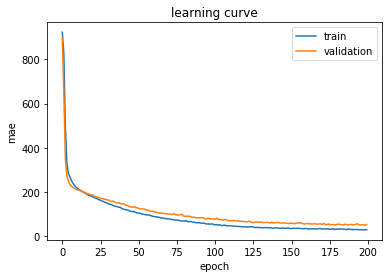

In [48]:
#learning curve
import matplotlib.pyplot as plt
plt.title('learning curve')
plt.xlabel('epoch')
plt.ylabel('mae')
plt.plot(a.history['loss'],label = 'train')
plt.plot(a.history['val_loss'],label= 'validation')
plt.legend()
plt.show()

In [49]:
mae = model.evaluate(x_test_scaled,y_test)
mae

10/10 [==============================] - 0s 2ms/step - loss: 76.9053 - mae: 76.9053


[76.90534210205078, 76.90534210205078]